In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

from scipy.signal import find_peaks

def load_profile(fn):    
    profile = np.loadtxt(fn, skiprows=3, delimiter=';', usecols=[0, 1])
    profile[:, 0] = profile[:, 0] / 1000
    profile[:, 0] = profile[:, 0] - profile[:, 0][np.argmax(profile[:, 1])]
    profile[:, 1] = profile[:, 1] / profile[:, 1].max()
    return profile

def plot_profile(profile, peaks, x_range):
    x = profile[:, 0]    
    y = profile[:, 1]
    # Plotting the cleaned intensity profile with corrected x-axis values
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Intensity Profile', color='b')
    plt.plot(x[peaks], y[peaks], 'ro', label='Prominent Peaks')
    plt.xlim(-1 * x_range, x_range)
    plt.xlabel('x (mm^-1)')
    plt.ylabel('Intensity (a.u.)')
    plt.title('FFT Image Profile Data (Corrected x-axis)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the peak detection function
def detect_prominent_peaks(profile, **kwargs):
    """
    Detect prominent peaks in the given intensity profile.

    Parameters:
    profile (numpy array): Array where the first column is x values and the second column is intensity (y) values.
    prominence (float): Prominence value for peak detection.

    Returns:
    peaks (numpy array): Indices of the detected peaks.
    actual_distances (numpy array): Actual distances between detected peaks.
    """
    # Extract x and y values from the profile
    x = profile[:, 0]
    y = profile[:, 1]

    # Perform peak detection
    peaks, properties = find_peaks(y, **kwargs)

    # If no peaks are detected, return empty arrays
    if len(peaks) == 0:
        return np.array([]), np.array([])

    # Determine the center peak (closest to the middle of the x range)
    center_peak = peaks[np.argmax(y[peaks])]

    # Exclude the center peak to prevent division by zero
    non_center_peaks = peaks[peaks != center_peak]

    # Calculate the distances from the center peak for each detected peak in the spatial domain
    # Since x is in the frequency domain, the actual distance in the spatial domain is the reciprocal of the frequency difference
    actual_distances = 1 / np.abs(x[non_center_peaks] - x[center_peak])
    return peaks, actual_distances


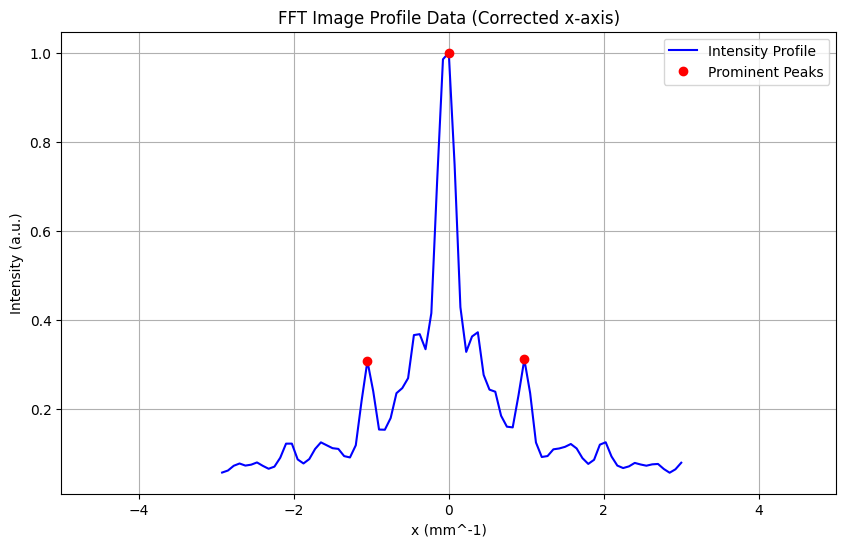

[0.95249589 1.02576475]


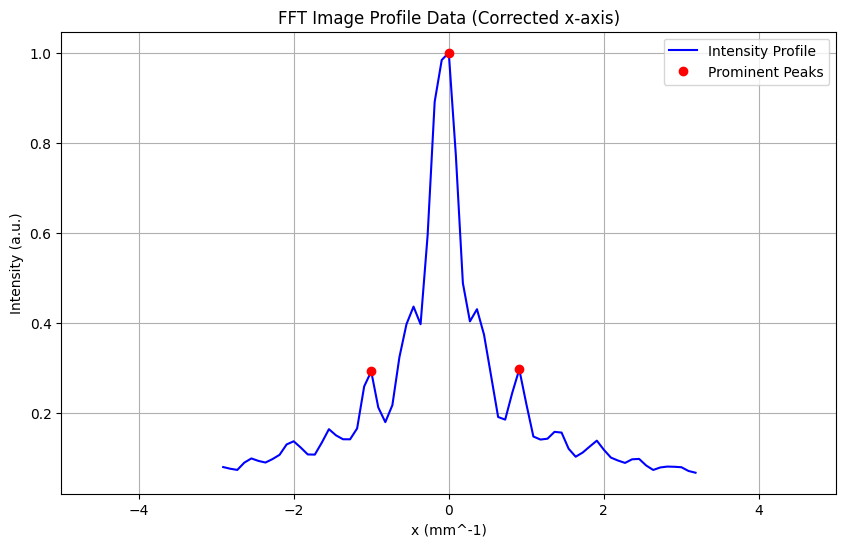

[0.99935332 1.09928863]


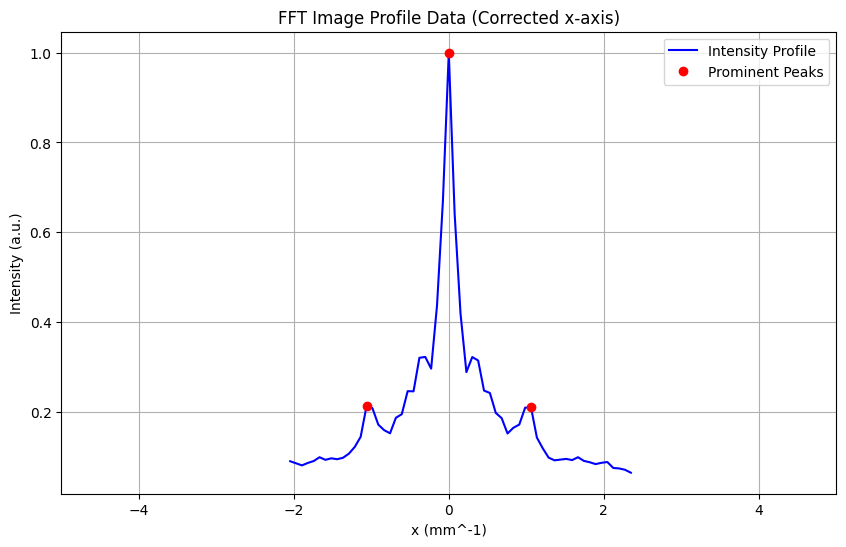

[0.94237154 0.94237144]


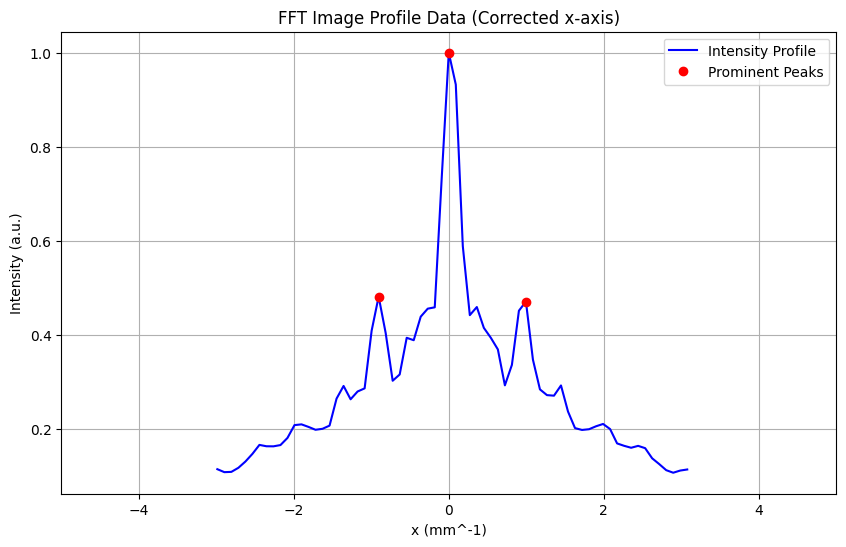

[1.10503184 1.00457453]


In [3]:
profile_list = ['ML2_Blue_Corrected_1_BW_FFT_20241009.csv', 'ML2_Blue_Corrected_2_BW_FFT_20241009.csv', 'ML2_Green_Corrected_1_BW_FFT_20241009.csv', 'ML2_Green_Corrected_2_BW_FFT_20241009.csv']
prominence_list = [0.1, 0.1, 0.05, 0.1]
for i, f in enumerate(profile_list):
    profile = load_profile(f'.\\{f}')
    peaks, actual_distances = detect_prominent_peaks(profile, prominence=prominence_list[i])
    plot_profile(profile, peaks, 5)
    print(actual_distances)

In [36]:
profile[:, 0][peaks]

array([2.3320449, 2.8761887, 3.3425976, 3.8867414, 4.4308852])

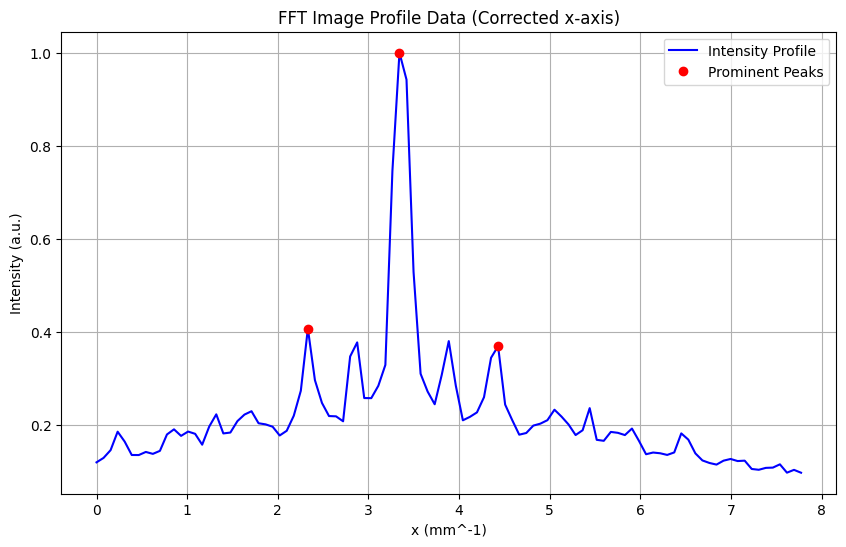

[0.47645359 0.91887475]


array([2.3320449, 3.3425976, 4.4308852])

In [50]:
peaks, actual_distance = detect_prominent_peaks(profile, prominence=0.15)
plot_profile(profile, peaks)
print(actual_distance)
profile[:, 0][peaks]

In [53]:
x = profile[:, 0]
# Determine the center peak (closest to the middle of the x range)
center_peak = peaks[np.argmax(y[peaks])]


# Exclude the center peak to prevent division by zero
non_center_peaks = peaks[peaks != center_peak]

print(center_peak, x[center_peak])

43 3.3425976


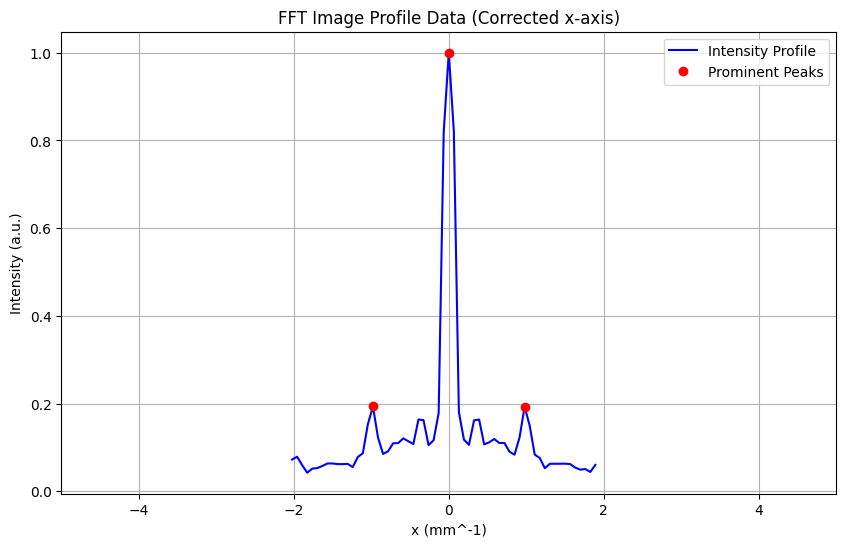

[1.02193282 1.02193282]


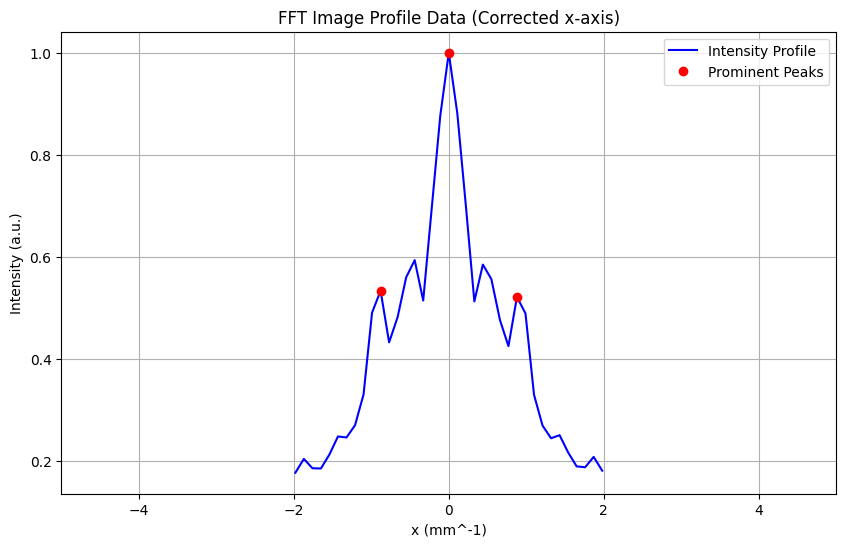

[1.13657674 1.13657662]


In [67]:
profile_list = ["FFT Peaks_Blue_1_Gwy.csv", "FFT Peaks_Blue_2_Gwy.csv"]
for f in profile_list:
    profile = load_profile(f'.\\{f}')
    peaks, actual_distances = detect_prominent_peaks(profile, prominence=0.08)
    plot_profile(profile, peaks, 5)
    print(actual_distances)